In [598]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [599]:
def creat3d_vec_xyz(start_points, end_points, colors=None):
    '''
    创建一个空间三维坐标系
    :param start_points: 绘制的数据起点
    :param end_points: 绘制的数据终点
    :param colors: 绘制的向量颜色
    :param view_angle: 观察角度
    :param azimuth: 方位角
    :return:
    '''
    assert start_points.shape == end_points.shape

    if colors is None:
        colors = np.random.randint(0, 255, size=start_points.shape, dtype=np.uint8)

    # ax = fig.gca(projection='3d')

    num_vec = start_points.shape[0]

    # q = ax.quiver(start_points[:, 0], start_points[:, 1], start_points[:, 2], end_points[:, 0], end_points[:, 1],
    #               end_points[:, 2], color="#666666", arrow_length_ratio=0.1)
    color = colors
    for i in range(num_vec):
        # color = '#'
        # for j in range(3):
        #     color += str(hex(colors[i, j]))[-2:].replace('x', '0').upper()
        ax.quiver(start_points[i, 0], start_points[i, 1], start_points[i, 2], end_points[i, 0], end_points[i, 1],
                      end_points[i, 2], color=color, arrow_length_ratio=0.1)


In [600]:
def f(x, y):
    return np.sqrt(x * y), -np.sqrt(x * y)

In [601]:
from utils import gen_uniform, gen_CGSE, gen_GOE, exp_sigma

In [602]:
x1 = np.linspace(0, 30, 300)
y1 = np.linspace(0, 30, 300)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = f(X1, Y1)[0]
Z2 = f(X1, Y1)[1]


In [603]:
def get_adb(X):
    return X[0, 0], X[1, 1], X[0, 1]

In [604]:
Sigma1 = np.array([[1, -1], [-1, 2]])
Sigma2 = np.array([[2, 1], [1, 2]])

X = gen_uniform(2, 5)
X = np.array([[ 1.89502826, -0.81862986], [-0.81862986, -3.41486021]])
# X = np.array([[1.71803238, 1.92026839], [1.92026839, 1.96874696]])
X_a, X_d, X_b = get_adb(X)

X_exp = exp_sigma(X)
X_exp_a, X_exp_d, X_exp_b = get_adb(X_exp)

X_exp_Sigma1 = exp_sigma(X, Sigma1)
X_exp_Sigma1_a, X_exp_Sigma1_d, X_exp_Sigma1_b = get_adb(X_exp_Sigma1)

X_exp_Sigma2 = exp_sigma(X, Sigma2)
X_exp_Sigma2_a, X_exp_Sigma2_d, X_exp_Sigma2_b = get_adb(X_exp_Sigma2)

invS1_X = np.linalg.solve(Sigma1, X)
invS1_X_a, invS1_X_d, invS1_X_b = get_adb(invS1_X)

invS2_X = np.linalg.solve(Sigma2, X)
invS2_X_a, invS2_X_d, invS2_X_b = get_adb(invS2_X)

exp_invS1_X = exp_sigma(invS1_X)
exp_invS1_X_a, exp_invS1_X_d, exp_invS1_X_b = get_adb(exp_invS1_X)

exp_invS2_X = exp_sigma(invS2_X)
exp_invS2_X_a, exp_invS2_X_d, exp_invS2_X_b = get_adb(exp_invS2_X)

In [605]:
start_points1 = np.array([[X_a, X_d, X_b]])
start_points2 = np.array([[X_a, X_d, X_b], [invS1_X_a, invS1_X_d, invS1_X_b], [exp_invS1_X_a, exp_invS1_X_d, exp_invS1_X_b]]) 
start_points3 = np.array([[X_a, X_d, X_b], [invS1_X_a, invS1_X_d, invS1_X_b], [exp_invS1_X_a, exp_invS1_X_d, exp_invS1_X_b]])

end_points1 = np.array([[X_exp_a, X_exp_d, X_exp_b]])
end_points2 = np.array([[invS1_X_a, invS1_X_d, invS1_X_b], [exp_invS1_X_a, exp_invS1_X_d, exp_invS1_X_b], [X_exp_Sigma1_a, X_exp_Sigma1_d, X_exp_Sigma1_b]]) 
end_points3 = np.array([[invS1_X_a, invS1_X_d, invS1_X_b], [exp_invS1_X_a, exp_invS1_X_d, exp_invS1_X_b], [X_exp_Sigma1_a, X_exp_Sigma1_d, X_exp_Sigma1_b]])

C:\Users\leroy\AppData\Local\Temp\ipykernel_780\581164442.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


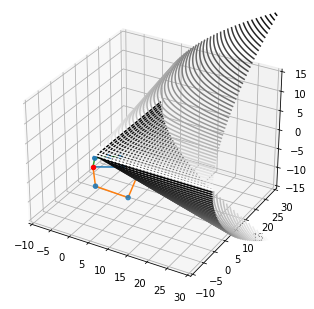

In [606]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = Axes3D(fig)
# ax = plt.axes(projection="3d")
plt.xlim(-10,30)
plt.ylim(-10,30)
ax.set_zlim(-15,15)

ax.contour3D(X1, Y1, Z1 ,50, cmap='binary')
ax.contour3D(X1, Y1, Z2 ,50, cmap='binary')

ax.scatter3D(X_a, X_d, X_b, c="r")

x, y, z = zip(get_adb(X_exp), get_adb(X_exp_Sigma1), get_adb(X_exp_Sigma2), get_adb(invS1_X), get_adb(invS2_X), get_adb(exp_invS1_X), get_adb(exp_invS2_X))
ax.scatter3D(x, y, z)

x1, y1, z1 = zip(get_adb(X), get_adb(X_exp))
x2, y2, z2 = zip(get_adb(X), get_adb(invS1_X), get_adb(exp_invS1_X), get_adb(X_exp_Sigma1))
x3, y3, z3 = zip(get_adb(X), get_adb(invS2_X), get_adb(exp_invS2_X), get_adb(X_exp_Sigma2))

plt.plot(x1, y1, z1)
plt.plot(x2, y2, z2)
plt.plot(x3, y3, z3)

plt.show()

In [607]:
print(X)

[[ 1.89502826 -0.81862986]
 [-0.81862986 -3.41486021]]
